In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import math


#importação do DataSet e padronização para Dataframe

Estou importando três arquivos diferentes:


*   County: Tem a informações sociais de cada um dos countys
*   President: Tem as informações de votos presidenciais nos diferentes countys
*   State_president: quantidade de votos por estado



In [ ]:
president=pd.read_csv("https://raw.githubusercontent.com/jonathanbff/Elections/main/president_county_candidate.csv")
print("O dataset possui {} linhas (registros) e {} colunas (features)".format(president.shape[0], president.shape[1]))

O dataset possui 31298 linhas (registros) e 5 colunas (features)


In [ ]:
president.head()

,state,county,candidate,party,votes
0,Delaware,Kent County,Joe Biden,DEM,44518
1,Delaware,Kent County,Donald Trump,REP,40976
2,Delaware,Kent County,Jo Jorgensen,LIB,1044
3,Delaware,Kent County,Howie Hawkins,GRN,420
4,Delaware,Kent County,Write-ins,WRI,0


Base de dados com informação sobre a extensão territorial de cada county:
https://web.archive.org/web/20201020031839/https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2015_Gazetteer/2015_Gaz_counties_national.zip

In [ ]:
density = pd.read_csv("https://raw.githubusercontent.com/jonathanbff/Elections/main/Population-Density%20By%20County.csv")
density.columns =['geo0', 'geo1', 'State', 'geoid', 'geoif', 'County', "Density"] 
density['chave'] = density['County'] + density['State']
density.head()




,geo0,geo1,State,geoid,geoif,County,Density,chave
0,0400000US01,1,Alabama,0500000US01001,1001,Autauga County,91.8,Autauga CountyAlabama
1,0400000US01,1,Alabama,0500000US01003,1003,Baldwin County,114.6,Baldwin CountyAlabama
2,0400000US01,1,Alabama,0500000US01005,1005,Barbour County,31.0,Barbour CountyAlabama
3,0400000US01,1,Alabama,0500000US01007,1007,Bibb County,36.8,Bibb CountyAlabama
4,0400000US01,1,Alabama,0500000US01009,1009,Blount County,88.9,Blount CountyAlabama


In [ ]:
votes = pd.read_csv("https://raw.githubusercontent.com/jonathanbff/Elections/main/winner_and_density.csv")
votes['chave'] = votes['County'] + votes['State']
votes.head()

,State,County,Votes Biden,Votes Trump,chave
0,Alabama,Autauga County,7450,19764,Autauga CountyAlabama
1,Alabama,Baldwin County,24344,83055,Baldwin CountyAlabama
2,Alabama,Barbour County,4772,5605,Barbour CountyAlabama
3,Alabama,Bibb County,1982,7508,Bibb CountyAlabama
4,Alabama,Blount County,2627,24595,Blount CountyAlabama


In [ ]:
df= pd.merge(votes, density, on='chave', how='inner')

df 



,State_x,County_x,Votes Biden,Votes Trump,chave,geo0,geo1,State_y,geoid,geoif,County_y,Density
0,Alabama,Autauga County,7450,19764,Autauga CountyAlabama,0400000US01,1,Alabama,0500000US01001,1001,Autauga County,91.8
1,Alabama,Baldwin County,24344,83055,Baldwin CountyAlabama,0400000US01,1,Alabama,0500000US01003,1003,Baldwin County,114.6
2,Alabama,Barbour County,4772,5605,Barbour CountyAlabama,0400000US01,1,Alabama,0500000US01005,1005,Barbour County,31.0
3,Alabama,Bibb County,1982,7508,Bibb CountyAlabama,0400000US01,1,Alabama,0500000US01007,1007,Bibb County,36.8
4,Alabama,Blount County,2627,24595,Blount CountyAlabama,0400000US01,1,Alabama,0500000US01009,1009,Blount County,88.9
...,...,...,...,...,...,...,...,...,...,...,...,...
3037,Wyoming,Sweetwater County,3822,12197,Sweetwater CountyWyoming,0400000US56,56,Wyoming,0500000US56037,56037,Sweetwater County,4.2
3038,Wyoming,Teton County,9848,4341,Teton CountyWyoming,0400000US56,56,Wyoming,0500000US56039,56039,Teton County,5.3
3039,Wyoming,Uinta County,1591,7494,Uinta CountyWyoming,0400000US56,56,Wyoming,0500000US56041,56041,Uinta County,10.1
3040,Wyoming,Washakie County,651,3245,Washakie CountyWyoming,0400000US56,56,Wyoming,0500000US56043,56043,Washakie County,3.8


In [ ]:
df = df.drop(['chave'], axis=1)
df = df.drop(['geo0'], axis=1)
df = df.drop(['geo1'], axis=1)
df = df.drop(['State_y'], axis=1)
df = df.drop(['geoid'], axis=1)
df = df.drop(['geoif'], axis=1)
df = df.drop(['County_y'], axis=1)


#Começo da análise


In [ ]:
df.describe()

,Votes Biden,Votes Trump,Density
count,3.042000e+03,3042.000000,3042.000000
mean,2.277015e+04,22032.258711,255.101019
std,8.419926e+04,49133.202204,1736.676781
min,0.000000e+00,0.000000,0.100000
25%,1.242000e+03,3552.250000,17.300000
50%,3.420000e+03,8018.500000,44.750000
75%,1.072650e+04,19516.500000,111.900000
max,2.486527e+06,933314.000000,69468.400000


In [ ]:
df.corr(method='pearson')

,Votes Biden,Votes Trump,Density
Votes Biden,1.000000,0.874632,0.325718
Votes Trump,0.874632,1.000000,0.194463
Density,0.325718,0.194463,1.000000


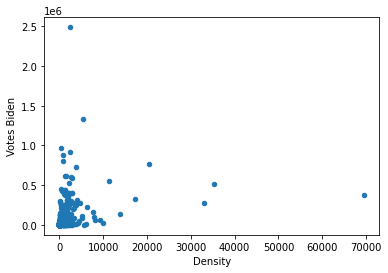

In [ ]:
df.plot.scatter('Density','Votes Biden')

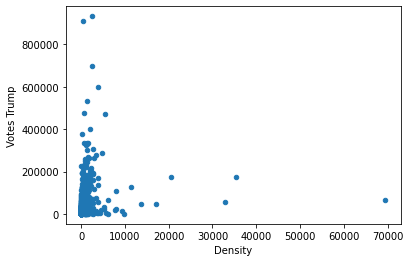

In [ ]:
df.plot.scatter('Density','Votes Trump')

#Análise com mudança nos dados

In [ ]:
df['total'] = df['Votes Biden'] + df['Votes Trump']
df

,State_x,County_x,Votes Biden,Votes Trump,Density,voto_final,total,porc_trump,porc_biden
0,Alabama,Autauga County,7450,19764,91.8,-12314,27214,137.694799,365.288591
1,Alabama,Baldwin County,24344,83055,114.6,-58711,107399,129.310698,441.172363
2,Alabama,Barbour County,4772,5605,31.0,-833,10377,185.138269,217.455993
3,Alabama,Bibb County,1982,7508,36.8,-5526,9490,126.398508,478.809284
4,Alabama,Blount County,2627,24595,88.9,-21968,27222,110.681033,1036.239056
...,...,...,...,...,...,...,...,...,...
3037,Wyoming,Sweetwater County,3822,12197,4.2,-8375,16019,131.335574,419.126112
3038,Wyoming,Teton County,9848,4341,5.3,5507,14189,326.860170,144.080016
3039,Wyoming,Uinta County,1591,7494,10.1,-5903,9085,121.230318,571.024513
3040,Wyoming,Washakie County,651,3245,3.8,-2594,3896,120.061633,598.463902


In [ ]:
df['porc_trump'] = ((df['total'] - df['Votes Trump'])/df['total'])*100
df['porc_biden'] = ((df['total'] - df['Votes Biden'])/df['total'])*100
df


,State_x,County_x,Votes Biden,Votes Trump,Density,voto_final,total,porc_trump,porc_biden,diferença
0,Alabama,Autauga County,7450,19764,91.8,-12314,27214,27.375615,72.624385,0.452488
1,Alabama,Baldwin County,24344,83055,114.6,-58711,107399,22.666878,77.333122,0.546662
2,Alabama,Barbour County,4772,5605,31.0,-833,10377,45.986316,54.013684,0.080274
3,Alabama,Bibb County,1982,7508,36.8,-5526,9490,20.885142,79.114858,0.582297
4,Alabama,Blount County,2627,24595,88.9,-21968,27222,9.650283,90.349717,0.806994
...,...,...,...,...,...,...,...,...,...,...
3037,Wyoming,Sweetwater County,3822,12197,4.2,-8375,16019,23.859167,76.140833,0.522817
3038,Wyoming,Teton County,9848,4341,5.3,5507,14189,69.405878,30.594122,-0.388118
3039,Wyoming,Uinta County,1591,7494,10.1,-5903,9085,17.512383,82.487617,0.649752
3040,Wyoming,Washakie County,651,3245,3.8,-2594,3896,16.709446,83.290554,0.665811


In [ ]:
df['diferença'] = df['porc_biden'] - df['porc_trump']
df.head()

,State_x,County_x,Votes Biden,Votes Trump,Density,voto_final,total,porc_trump,porc_biden,diferença
0,Alabama,Autauga County,7450,19764,91.8,-12314,27214,27.375615,72.624385,45.248769
1,Alabama,Baldwin County,24344,83055,114.6,-58711,107399,22.666878,77.333122,54.666245
2,Alabama,Barbour County,4772,5605,31.0,-833,10377,45.986316,54.013684,8.027368
3,Alabama,Bibb County,1982,7508,36.8,-5526,9490,20.885142,79.114858,58.229715
4,Alabama,Blount County,2627,24595,88.9,-21968,27222,9.650283,90.349717,80.699434


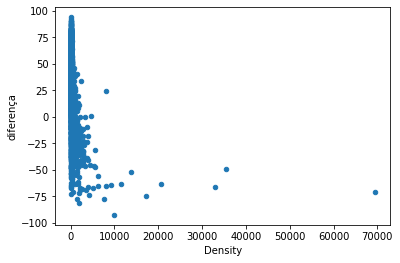

In [ ]:
df.plot.scatter('Density','diferença')

In [ ]:
df.corr(method='pearson')

,Votes Biden,Votes Trump,Density,voto_final,total,porc_trump,porc_biden,diferença
Votes Biden,1.000000,0.874632,0.325718,0.865867,0.982908,0.396891,-0.396891,-0.396891
Votes Trump,0.874632,1.000000,0.194463,0.514788,0.948931,0.327159,-0.327159,-0.327159
Density,0.325718,0.194463,1.000000,0.375337,0.285814,0.261889,-0.261889,-0.261889
voto_final,0.865867,0.514788,0.375337,1.000000,0.758969,0.364282,-0.364282,-0.364282
total,0.982908,0.948931,0.285814,0.758969,1.000000,0.382524,-0.382524,-0.382524
porc_trump,0.396891,0.327159,0.261889,0.364282,0.382524,1.000000,-1.000000,-1.000000
porc_biden,-0.396891,-0.327159,-0.261889,-0.364282,-0.382524,-1.000000,1.000000,1.000000
diferença,-0.396891,-0.327159,-0.261889,-0.364282,-0.382524,-1.000000,1.000000,1.000000


#Teste

In [ ]:
!pip install wikipedia
import wikipedia
from wordcloud import WordCloud, STOPWORDS

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=a6b841bfb3f455732b2d6dd18d59dc4db7f306c2674087a5b3f6b96a0833599d
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [ ]:
df1 = wikipedia.page('Donald Trump')
df1_content = df1.content
df1.content

'Donald John Trump (born June 14, 1946) is the 45th and current president of the United States. Before entering politics, he was a businessman and television personality.\nBorn and raised in Queens, New York City, Trump attended Fordham University for two years and received a bachelor\'s degree in economics from the Wharton School of the University of Pennsylvania. He became president of his father\'s real estate business in 1971, renamed it The Trump Organization, and expanded its operations to building or renovating skyscrapers, hotels, casinos, and golf courses. Trump later started various side ventures, mostly by licensing his name. Trump and his businesses have been involved in more than 4,000 state and federal legal actions, including six bankruptcies. He owned the Miss Universe brand of beauty pageants from 1996 to 2015, and produced and hosted the reality television series The Apprentice from 2004 to 2015.\nTrump\'s political positions have been described as populist, protectio

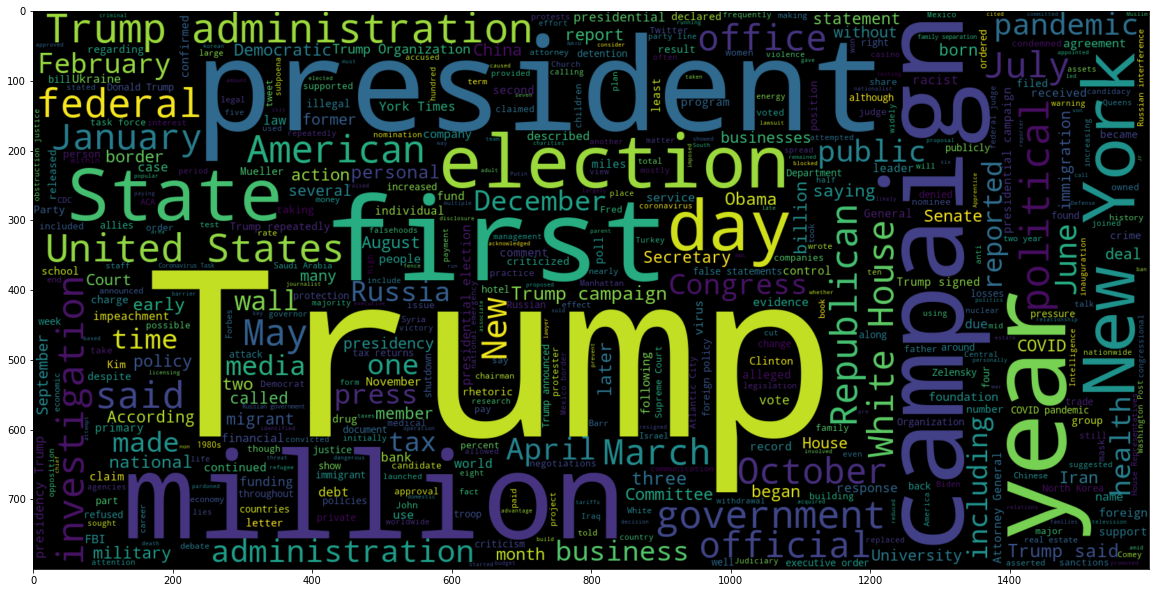

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800 , stopwords = STOPWORDS)
wc.generate(df1_content) # Generating WordCloud
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
df1 = wikipedia.page('Biden')
df1_content = df1.content
df1.content

'Joseph Robinette Biden Jr. ( BY-dən; born November 20, 1942) is an American politician and president-elect of the United States. After defeating incumbent Donald Trump in the 2020 United States presidential election, he will be inaugurated as the 46th president in January 2021. A member of the Democratic Party, Biden previously served as the 47th vice president from 2009 to 2017 and United States Senator for Delaware from 1973 to 2009.\nRaised in Scranton, Pennsylvania, and New Castle County, Delaware, Biden studied at the University of Delaware before earning his law degree from Syracuse University in 1968. He was elected a New Castle County Councillor in 1970, and became the sixth-youngest senator in American history when he was elected to the U.S. Senate from Delaware in 1972, at the age of 29. Biden was a longtime member of the Senate Foreign Relations Committee, and eventually its chairman. He opposed the Gulf War in 1991, but supported expanding the NATO alliance into Eastern Eu

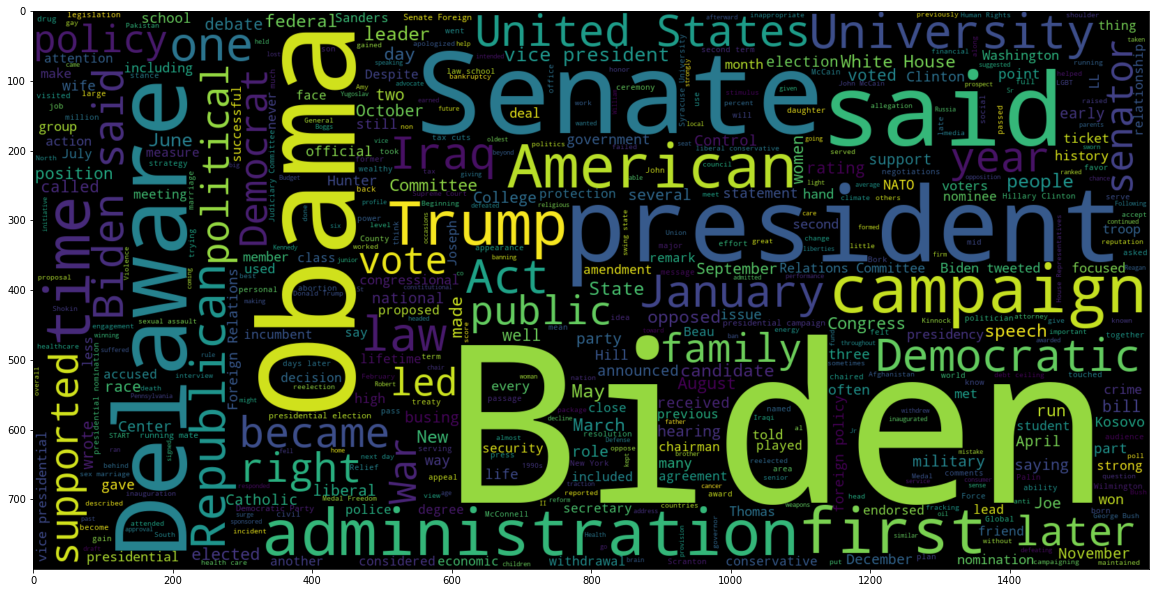

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800 , stopwords = STOPWORDS)
wc.generate(df1_content) # Generating WordCloud
plt.imshow(wc , interpolation = 'bilinear')